# Web Scraping Walkthrough Tutorial

## Collecting web data without API

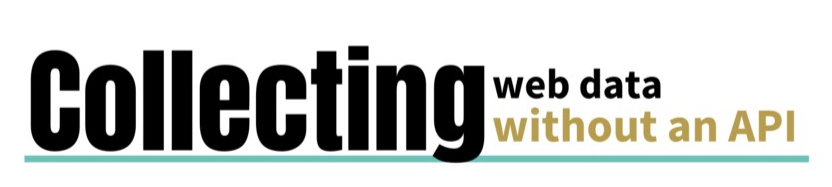

### Basic Introduction
* Data science project start with the collection of data. The data can be collected from the database, internet/online and offline mode. These days most of the information is available online.
> Retrieving data online can be either
* by downloading a copy of it provided to us by website creators via .csv or comma-separated values files, 
* or through an API (Application Programming Interface). 
* Other times, we need to collect text from the web ourselves. 

If the third option is the case, two instances can occur
* If there’s not much data, it might be possible to just manually copy and paste it — a bit tedious, perhaps, but not too much trouble. And if you just want to extract a table or two from a webpage, you can even use `pandas.read_html()` to load and parse the page, automatically extracting tables as dataframes,
* but if otherwise is the case, then our last resort is through **`web scraping`**

### What is web scraping?
Web scraping is a term for various method that used to extract or fetch data from a website.
Web scraping can be done manually by a software user, the term typically refers to automated processes implemented using a bot or web crawler. It is a form of copying, in which specific data is gathered and copied from the web, typically into a central local database or spreadsheet, for later retrieval or analysis.

**Prequisite Knowledge:** `Understanding of HTML and CSS`

### What is in here:
In this tutorial, we’ll show you how to extract data from Wikipedia pages.

### Mission:
* Let get the list of Wikipedia URLs for the cities of the UK
* Which country it is in
* The current population
* A list of other Wikipedia pages the city article links to in its introduction

### Where we go:
The first three items on this list will require extracting data from tables. The last item will extract data that is not in a table, which pandas would not be able to extract.

For the first mission, the process looks like this:

* Generate a list of Wikipedia URLs for the cities of the UK
* Access each URL and extract the above information
* Save the extracted information to disk for analysis later on  

In [1]:
# importing libraries
import requests
from bs4 import BeautifulSoup as bs

To learn more about [requests](http://www.python-requests.org/en/latest/user/quickstart/)

To learn more about [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [2]:
# getting the webpage
cities_list = requests.get('https://en.wikipedia.org/wiki/List_of_cities_in_the_United_Kingdom')

In [3]:
print('status:',cities_list.status_code,',' ,cities_list.reason, '\n', 
      'length of character:', len(cities_list.content))

status: 200 , OK 
 length of character: 306510


The `city_list` variable contains all the HTTP data for the URL we accessed. 
The request was successful, as a status code of 200 was returned, and around 300k characters of HTML were retrieved.

* At this point, we need to find the “List of cities” table in the HTML.
* This can be done by viewing the page source (available from the right-click menu in most web browsers)
* Then search for `<table tag` to find the start of any tables.
* This page contains four but the one we want looks like this:

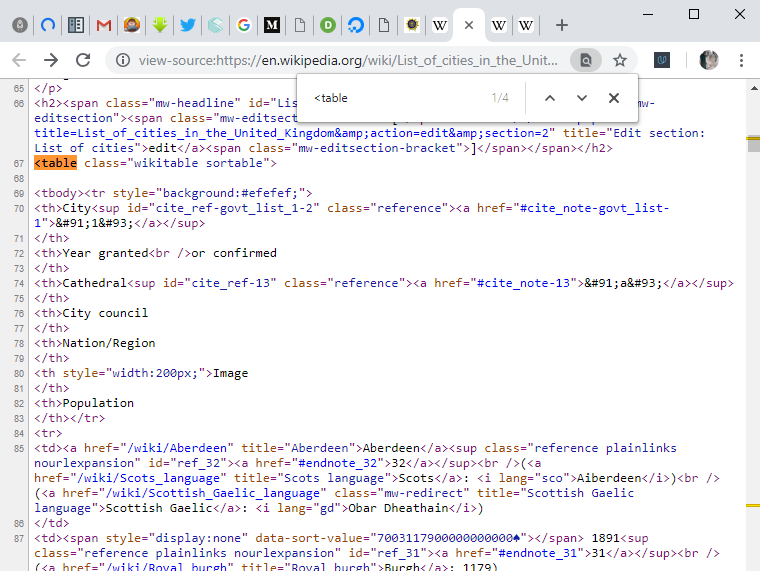

In [4]:
# initialize the parser and pass in the content 
cities_list = bs(cities_list.content,'html.parser')

In [5]:
cities_list

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of cities in the United Kingdom - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_cities_in_the_United_Kingdom","wgTitle":"List of cities in the United Kingdom","wgCurRevisionId":863888047,"wgRevisionId":863888047,"wgArticleId":779970,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with Latin-language external links","Webarchive template wayback links","All articles with dead external links","Articles with dead external links from October 2017","Articles with permanently dead external links","CS1: Julian–Gregorian uncertainty"

In [6]:
# extracts the needed table with the provided criteria
table = cities_list.find_all('table',class_='wikitable sortable')

In [7]:
# number of table found
print(f'Found {len(table)} {"table" if len(table)== 1 else "tables"}')

Found 1 table


In [8]:
# because find_all return a list
table = table[0]

HTML tables are organised by rows, which are `tr elements` inside the parent table. These can be extracted using `find_all method`

In [9]:
table_rows = table.find_all('tr')
print(f'found {len(table_rows)} row/rows')

found 70 row/rows


In [10]:
table_rows

[<tr style="background:#efefef;">
 <th>City<sup class="reference" id="cite_ref-govt_list_1-2"><a href="#cite_note-govt_list-1">[1]</a></sup>
 </th>
 <th>Year granted<br/>or confirmed
 </th>
 <th>Cathedral<sup class="reference" id="cite_ref-13"><a href="#cite_note-13">[a]</a></sup>
 </th>
 <th>City council
 </th>
 <th>Nation/Region
 </th>
 <th style="width:200px;">Image
 </th>
 <th>Population
 </th></tr>, <tr>
 <td><a href="/wiki/Aberdeen" title="Aberdeen">Aberdeen</a><sup class="reference plainlinks nourlexpansion" id="ref_32"><a href="#endnote_32">32</a></sup><br/>(<a href="/wiki/Scots_language" title="Scots language">Scots</a>: <i lang="sco">Aiberdeen</i>)<br/>(<a class="mw-redirect" href="/wiki/Scottish_Gaelic_language" title="Scottish Gaelic language">Scottish Gaelic</a>: <i lang="gd">Obar Dheathain</i>)
 </td>
 <td><span data-sort-value="7003117900000000000♠" style="display:none"></span> 1891<sup class="reference plainlinks nourlexpansion" id="ref_31"><a href="#endnote_31">31</a><

#### Get a better understanding of table in html: 

    <!DOCTYPE html>
    <html>
    <body>

    <h2>Basic HTML Table</h2>

    <table style="width:100%">
      <tr>
        <th>Firstname</th>
        <th>Lastname</th> 
        <th>Age</th>
      </tr>
      <tr>
        <td>Jill</td>
        <td>Smith</td>
        <td>50</td>
      </tr>
      <tr>
        <td>Eve</td>
        <td>Jackson</td>
        <td>94</td>
      </tr>
      <tr>
        <td>John</td>
        <td>Doe</td>
        <td>80</td>
      </tr>
    </table>

    </body>
    </html>


<!DOCTYPE html>
<html>
<body>

<h2>Basic HTML Table</h2>

<table style="width:100%">
  <tr>
    <th>Firstname</th>
    <th>Lastname</th> 
    <th>Age</th>
  </tr>
  <tr>
    <td>Jill</td>
    <td>Smith</td>
    <td>50</td>
  </tr>
  <tr>
    <td>Eve</td>
    <td>Jackson</td>
    <td>94</td>
  </tr>
  <tr>
    <td>John</td>
    <td>Doe</td>
    <td>80</td>
  </tr>
</table>

</body>
</html>


* The cells in each row are `td elements`. 
* The exception is the header row, which are `th`. 
* Again, these can be extracted from each row using `find_all()`. 
* We only want the first column of the table, which has the links to the cities' pages. 
* This link is an `a element`, which can be extracted just like the other elements. 
* It's clear from the `HTML` source that the first link is what we want. 
* Once this has been found, it is the `href attribute` that needs to be extracted - this is the actual link. 
* Finally, the links will be relative rather than absolute, so it will be necessary to prepend the domain name onto them.

In [11]:
links = []

for row in table_rows:
    try: 
        cells = row.find_all('td')[0]
        link = cells.find_all('a')[0]
        # You can access a tag’s attributes by treating the tag like a dictionary
        link = link.attrs['href'] 
        links.append(f'https://en.wikipedia.org{link}')
    except:pass
    
print(f'Extracted {len(links)} links. Is this the right number? {"Yes" if len(links) == 69 else "No"}.')
links[0:4]

Extracted 69 links. Is this the right number? Yes.


['https://en.wikipedia.org/wiki/Aberdeen',
 'https://en.wikipedia.org/wiki/Armagh',
 'https://en.wikipedia.org/wiki/Bangor,_Gwynedd',
 'https://en.wikipedia.org/wiki/Bath,_Somerset']

**Mission 2:** 
*Which country is in*

* From look of things, the country for each city is in the fifth column 
* The heading name is `Nation/Region`
* It is place in an `a tag`
* Some have two `a tag` with a comma between them , others are just one `a tag`

In [74]:
countries = []

for rows in table_rows:
    try:
        cells = (rows.find_all('td',limit=5)[-1]
                .find_all('a'))
        countries.append(cells[0].text if len(cells)==1 
                         else f'{cells[0].text},{cells[1].text}')
    except: pass
print(f'Extracted {len(countries)} countries.'
      f'Is this the right number? {"Yes" if len(countries) == 69 else "No"}.')

Extracted 69 countries.Is this the right number? Yes.


In [21]:
countries

['Scotland',
 'Northern Ireland',
 'Wales',
 'South West,England',
 'Northern Ireland',
 'West Midlands,England',
 'Yorkshire and the Humber,England',
 'South East,England',
 'South West,England',
 'East,England',
 'South East,England',
 'Wales',
 'North West,England',
 'East,England',
 'North West,England',
 'South East,England',
 'West Midlands,England',
 'East Midlands,England',
 'Northern Ireland',
 'Scotland',
 'North East,England',
 'Scotland',
 'East,England',
 'South West,England',
 'Scotland',
 'South West,England',
 'West Midlands,England',
 'Scotland',
 'Yorkshire and the Humber,England',
 'North West,England',
 'Yorkshire and the Humber,England',
 'East Midlands,England',
 'West Midlands,England',
 'East Midlands,England',
 'Northern Ireland',
 'North West,England',
 'London',
 'North West,England',
 'North East,England',
 'Wales',
 'Northern Ireland',
 'East,England',
 'East Midlands,England',
 'South East,England',
 'Scotland',
 'East,England',
 'South West,England',
 'So

**Mission 3:** 
*The current population*

* The population is in the last column with header population
* They are placed after a `sup tag`

In [73]:
population = []

for rows in table_rows:
    try:
        cells = (rows.find_all('td')[-1]
                .contents[1]
                .split()[0])
        population.append(cells)
    except: pass
print(f'Extracted population value for {len(population)} countries.'
      f'Is this the right number? {"Yes" if len(population) == 69 else "No"}.')

Extracted population value for 69 countries.Is this the right number? Yes.


at line 5, I retrieved all `td tag` and picked the last one which correspond to the last column
line 6, I obtained the list of the tag's children and pick the second child which correspond to the population value
line 7, some of the value obtained have its corresponding year with it seperated by a space, hence I splitted it and get the first string that correspond to the real value wanted 

In [67]:
population

['189,120',
 '59,340',
 '18,808',
 '88,859',
 '333,871',
 '1,092,330',
 '522,452',
 '273,369',
 '428,234',
 '123,867',
 '151,145',
 '346,090',
 '107,524',
 '168,310',
 '91,733',
 '26,795',
 '316,915',
 '248,752',
 '107,877',
 '153,990',
 '94,375',
 '468,720',
 '20,256',
 '117,773',
 '603,080',
 '121,688',
 '58,896',
 '79,415',
 '256,406',
 '138,375',
 '751,485',
 '329,839',
 '32,219',
 '93,541',
 '120,165',
 '466,415',
 '7,375',
 '503,127',
 '280,177',
 '145,736',
 '29,946',
 '132,512',
 '305,680',
 '151,906',
 '45,770',
 '183,631',
 '256,384',
 '205,056',
 '140,202',
 '16,702',
 '140,644',
 '3,355',
 '1,841',
 '233,933',
 '40,302',
 '552,698',
 '236,882',
 '34,790',
 '249,008',
 '275,506',
 '239,023',
 '18,766',
 '325,837',
 '10,536',
 '219,396',
 '116,595',
 '249,470',
 '98,768',
 '198,051']

**Mission 4:** 
*List of wikipedia URLs in the introduction*

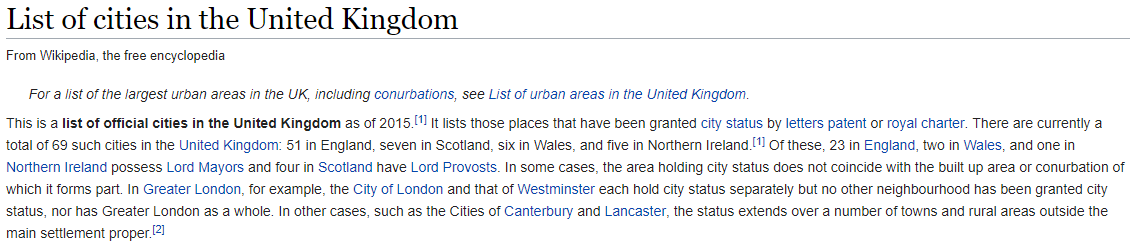

In [97]:
first = (cities_list.
         find('div',class_='hatnote navigation-not-searchable')
         .find_all('a')
         )
intro_links = [row.attrs['href'] for row in first]


In [140]:
others = (cities_list.
         find('div',class_='hatnote navigation-not-searchable')
         .next_sibling.next_sibling
         .find_all('a'))
other_links = [f'https://en.wikipedia.org{row.attrs["href"]}' 
               for row in others if re.match(r'/...',row.attrs['href'])]

In [141]:
other_links

['https://en.wikipedia.org/wiki/City_status_in_the_United_Kingdom',
 'https://en.wikipedia.org/wiki/Letters_patent',
 'https://en.wikipedia.org/wiki/Royal_charter',
 'https://en.wikipedia.org/wiki/United_Kingdom',
 'https://en.wikipedia.org/wiki/List_of_lord_mayoralties_and_lord_provostships_in_the_United_Kingdom#England',
 'https://en.wikipedia.org/wiki/List_of_lord_mayoralties_and_lord_provostships_in_the_United_Kingdom#Wales',
 'https://en.wikipedia.org/wiki/Belfast',
 'https://en.wikipedia.org/wiki/Lord_Mayor',
 'https://en.wikipedia.org/wiki/List_of_lord_mayoralties_and_lord_provostships_in_the_United_Kingdom#Scotland',
 'https://en.wikipedia.org/wiki/Lord_Provost',
 'https://en.wikipedia.org/wiki/Greater_London',
 'https://en.wikipedia.org/wiki/City_of_London',
 'https://en.wikipedia.org/wiki/City_of_Westminster',
 'https://en.wikipedia.org/wiki/City_of_Canterbury',
 'https://en.wikipedia.org/wiki/City_of_Lancaster']

In [142]:
all_links = other_links[:]
for link in intro_links:all_links.append(f'https://en.wikipedia.org{link}')   

In [143]:
all_links

['https://en.wikipedia.org/wiki/City_status_in_the_United_Kingdom',
 'https://en.wikipedia.org/wiki/Letters_patent',
 'https://en.wikipedia.org/wiki/Royal_charter',
 'https://en.wikipedia.org/wiki/United_Kingdom',
 'https://en.wikipedia.org/wiki/List_of_lord_mayoralties_and_lord_provostships_in_the_United_Kingdom#England',
 'https://en.wikipedia.org/wiki/List_of_lord_mayoralties_and_lord_provostships_in_the_United_Kingdom#Wales',
 'https://en.wikipedia.org/wiki/Belfast',
 'https://en.wikipedia.org/wiki/Lord_Mayor',
 'https://en.wikipedia.org/wiki/List_of_lord_mayoralties_and_lord_provostships_in_the_United_Kingdom#Scotland',
 'https://en.wikipedia.org/wiki/Lord_Provost',
 'https://en.wikipedia.org/wiki/Greater_London',
 'https://en.wikipedia.org/wiki/City_of_London',
 'https://en.wikipedia.org/wiki/City_of_Westminster',
 'https://en.wikipedia.org/wiki/City_of_Canterbury',
 'https://en.wikipedia.org/wiki/City_of_Lancaster',
 'https://en.wikipedia.org/wiki/Conurbation',
 'https://en.wiki

In [144]:
other_links 

['https://en.wikipedia.org/wiki/City_status_in_the_United_Kingdom',
 'https://en.wikipedia.org/wiki/Letters_patent',
 'https://en.wikipedia.org/wiki/Royal_charter',
 'https://en.wikipedia.org/wiki/United_Kingdom',
 'https://en.wikipedia.org/wiki/List_of_lord_mayoralties_and_lord_provostships_in_the_United_Kingdom#England',
 'https://en.wikipedia.org/wiki/List_of_lord_mayoralties_and_lord_provostships_in_the_United_Kingdom#Wales',
 'https://en.wikipedia.org/wiki/Belfast',
 'https://en.wikipedia.org/wiki/Lord_Mayor',
 'https://en.wikipedia.org/wiki/List_of_lord_mayoralties_and_lord_provostships_in_the_United_Kingdom#Scotland',
 'https://en.wikipedia.org/wiki/Lord_Provost',
 'https://en.wikipedia.org/wiki/Greater_London',
 'https://en.wikipedia.org/wiki/City_of_London',
 'https://en.wikipedia.org/wiki/City_of_Westminster',
 'https://en.wikipedia.org/wiki/City_of_Canterbury',
 'https://en.wikipedia.org/wiki/City_of_Lancaster']

In [149]:
records = [(country,population[ind],links[ind]) 
           for ind,country in enumerate(countries)]

In [151]:
len(records)

69

In [152]:
import pandas as pd

In [154]:
df=pd.DataFrame(records, columns=['country','population','links'])

In [155]:
df.to_csv('list_of_cities_in_UK.csv',index=False,encoding='UTF-8')

In [156]:
df = pd.read_csv('list_of_cities_in_UK.csv')

In [157]:
df

,country,population,links
0,Scotland,"189,120",https://en.wikipedia.org/wiki/Aberdeen
1,Northern Ireland,"59,340",https://en.wikipedia.org/wiki/Armagh
2,Wales,"18,808","https://en.wikipedia.org/wiki/Bangor,_Gwynedd"
3,"South West,England","88,859","https://en.wikipedia.org/wiki/Bath,_Somerset"
4,Northern Ireland,"333,871",https://en.wikipedia.org/wiki/Belfast
5,"West Midlands,England","1,092,330",https://en.wikipedia.org/wiki/Birmingham
6,"Yorkshire and the Humber,England","522,452",https://en.wikipedia.org/wiki/City_of_Bradford
7,"South East,England","273,369",https://en.wikipedia.org/wiki/Brighton_and_Hove
8,"South West,England","428,234",https://en.wikipedia.org/wiki/Bristol
9,"East,England","123,867",https://en.wikipedia.org/wiki/Cambridge
